In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import cross_val_score
%matplotlib inline

from graphviz  import Source
from IPython.display import SVG, display, HTML
style = "<style>svg{width: 50% !important; height: 50% !important;} </style>" 

In [2]:
iris_data = pd.read_csv('C:\\Users\\Gazauto\\Downloads\\train_iris.csv')

In [3]:
iris_data.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [4]:
iris_data.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [5]:
X_train = iris_data.drop(['species'], axis=1)
X_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width
0,130,7.4,2.8,6.1,1.9
1,7,5.0,3.4,1.5,0.2
2,11,4.8,3.4,1.6,0.2
3,142,5.8,2.7,5.1,1.9
4,109,7.2,3.6,6.1,2.5


In [6]:
y_train = iris_data['species']
y_train.head()

0    2
1    0
2    0
3    2
4    2
Name: species, dtype: int64

In [7]:
iris_data_test = pd.read_csv('C:\\Users\\Gazauto\\Downloads\\test_iris.csv')
iris_data_test.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [8]:
X_test = iris_data_test.drop(['species'], axis=1)
X_test.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width
0,114,5.8,2.8,5.1,2.4
1,70,5.9,3.2,4.8,1.8
2,138,6.0,3.0,4.8,1.8
3,59,5.2,2.7,3.9,1.4
4,44,5.1,3.8,1.9,0.4


In [9]:
y_test = iris_data_test['species']
y_test.head()

0    2
1    1
2    2
3    1
4    0
Name: species, dtype: int64

In [10]:
max_depth_values = range(1,100)

In [12]:
scores_date = pd.DataFrame()

In [13]:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()
    temp_score_date = pd.DataFrame({'max_depth': [max_depth], 'train_score': [train_score], 'test_score': [test_score], 'cross_val_score': mean_cross_val_score})
    scores_date = scores_date.append(temp_score_date)
scores_date.head()

,max_depth,train_score,test_score,cross_val_score
0,1,0.7,0.6,0.70
0,2,1.0,1.0,0.98
0,3,1.0,1.0,0.98
0,4,1.0,1.0,0.96
0,5,1.0,1.0,0.96


In [14]:
scores_date_long = pd.melt(scores_date, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], var_name='set_type', value_name='score')
scores_date_long.head()

,max_depth,set_type,score
0,1,train_score,0.7
1,2,train_score,1.0
2,3,train_score,1.0
3,4,train_score,1.0
4,5,train_score,1.0


<AxesSubplot:xlabel='max_depth', ylabel='score'>

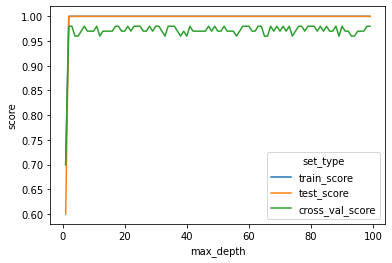

In [15]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_date_long)